#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
data=np.loadtxt('housing.csv')
df=pd.DataFrame(data,columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","PRICE"])

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM: уровень преступности на душу населения по городам
- ZN: доля жилых земель, отнесенных к участкам площадью более 25 000 кв. футов.
- INDUS: доля нерозничных коммерческих площадей в акрах на город
- CHAS: фиктивная переменная реки Чарльз (= 1, если участок граничит с рекой; 0 в противном случае)
- NOX: концентрация оксидов азота (частей на 10 миллионов)
- RM: среднее количество комнат в жилище
- AGE: доля жилых единиц, построенных до 1940 года, в которых проживают владельцы.
- DIS: взвешенные расстояния до пяти центров занятости Бостона
- RAD: индекс доступности радиальных магистралей
- TAX: ставка налога на полную стоимость имущества за 10 000 долларов США
- PTRATIO: соотношение учеников и учителей по городам 12. B: 1000(Bk−0,63)2, где Bk — доля чернокожих по городам 13. LSTAT: % населения с более низким статусом
- PRICE: Медианная стоимость домов, занимаемых владельцами, в тысячах долларов США

In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [8]:
df.duplicated().sum()

0

#### Data correlation

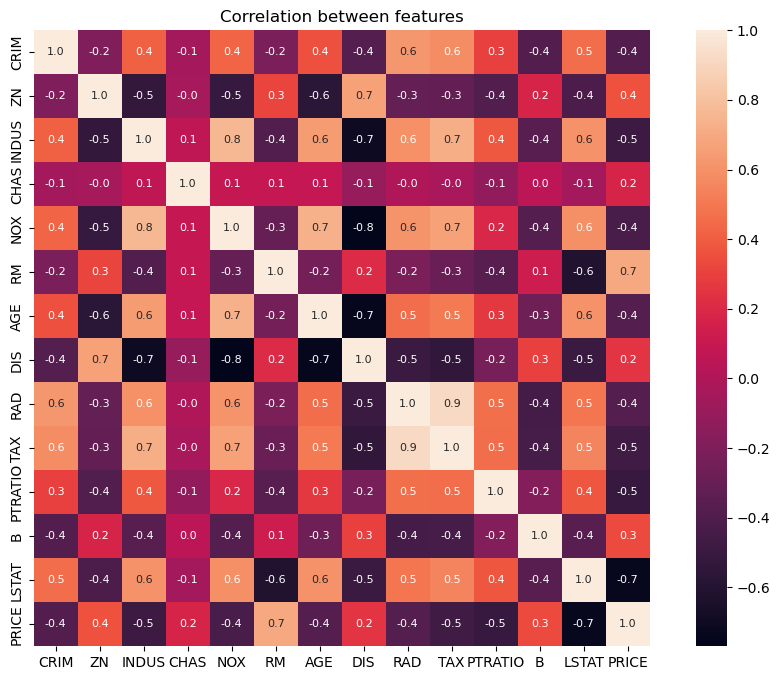

In [9]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8})
plt.title('Correlation between features')
plt.show()

#### Train Test Split

In [10]:
X = df.drop(['TAX', 'PRICE'], axis = 1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 12) (102, 12) (404,) (102,)


#### XGBRegressor

In [11]:
model = XGBRegressor(max_depth = 3, n_estimators = 100,random_state = 42, n_jobs = -1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [12]:
# Accuracy on Training data
X_train_prediction = model.predict(X_train)
MAE = metrics.mean_absolute_error(X_train_prediction, y_train)
R_squared = metrics.r2_score(X_train_prediction, y_train)
print('Mean Absolute Error: ', MAE)
print('R squared Error: ', R_squared)

Mean Absolute Error:  0.5929591497572342
R squared Error:  0.9929858710239765


In [13]:
# Accuracy on Test data
X_test_prediction = model.predict(X_test)
MAE = metrics.mean_absolute_error(X_test_prediction, y_test)
R_squared = metrics.r2_score(X_test_prediction, y_test)
print('Mean Absolute Error: ', MAE)
print('R squared Error: ', R_squared)

Mean Absolute Error:  1.8673992596420586
R squared Error:  0.9012704263225457


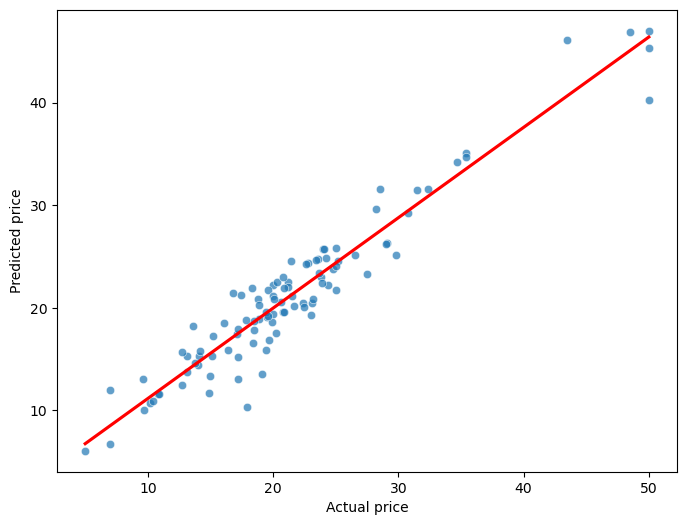

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=X_test_prediction, alpha=0.7)
sns.regplot(x=y_test, y=X_test_prediction, scatter=False, color='red', ci=None)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()